# Greenpeace International Insights Team

## Facebook report 2017

Built using [Jupyter Lab](https://jupyterlab.readthedocs.io/en/latest/), a Python framework for working with data.

Data source from the Google Spreadsheet [FB Analysis 2017](https://docs.google.com/spreadsheets/d/13mGoZBTZ7PvzOwFNYZCFe8L1q5ICSexD-sUrcfEp6k4/edit#gid=1739593191) and imported here as csv with corrections made for column headers and index seat to NRO names.

__This document is using live data and is editable but you can't save your work here.__

Please play and experiment as much as you want but changes will need to be submitted back to the Git repository currently hosted at <https://github.com/gyaresu/insights>

<gareth@greenpeace.org>

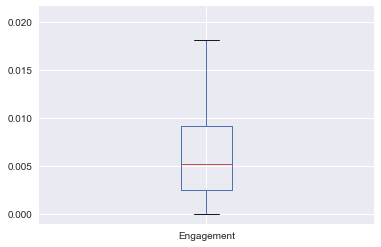

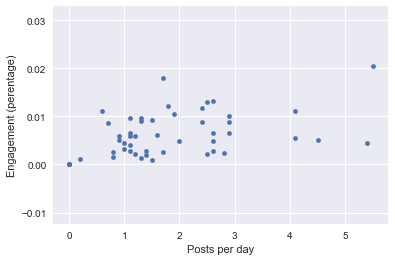

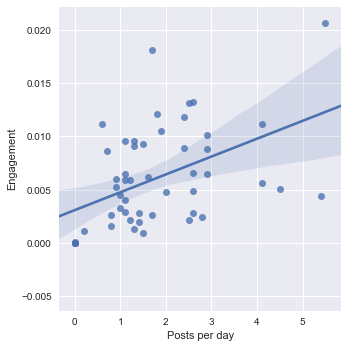

In [8]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Google Spreadsheet: "Fb Analysis 2017"
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS31wVJrsgO_dxqgvDQipkdySgF3cMfP9M3fhnce5bcGutq_I_q0M7cAwyLwGGifvJm4epJoXfXmxat/pub?output=csv'

# Read the file as a CSV. Set the correct row and columns for headers and index.
# Tell Pandas that the columns with numbers are using commas for separators.
df = pd.read_csv(url, encoding = 'utf8', header=3, index_col = 'Page', thousands=',')

# Get rid of the random empty column
df = df.drop(columns=['Unnamed: 0'], axis=1)

# Convert the percentages (30%) to decimal (0.03)
df['Page Performance Index'] = df['Page Performance Index'].str.rstrip('%').astype('float') / 100.0
df['Growth (rate)'] = df['Growth (rate)'].str.rstrip('%').astype('float') / 100.0
df['Engagement'] = df['Engagement'].str.rstrip('%').astype('float') / 100.0
df['Weighted Engagement'] = df['Weighted Engagement'].str.rstrip('%').astype('float') / 100.0
df['Post interaction'] = df['Post interaction'].str.rstrip('%').astype('float') / 100.0

# For testing: Show the types of each column
#df.dtypes

# For testing: Show the first 5 rows
#df.head(5)

# Box plot
df.plot(kind='box', x='Posts per day', y='Engagement', logy=False, logx=False)#, s='Number of fans')

# Scatter plot
df.plot(kind='scatter', x='Posts per day', y='Engagement', logy=False, logx=False)#, s='Number of fans')
plt.ylabel('Engagement (perentage)')
plt.xlabel('Posts per day')

# Seaborn scatter plot
sns.lmplot(x='Posts per day', y='Engagement', data=df)
plt.show()


# Playing with the data set

In [4]:
# What are the data types of each column?
df.dtypes

Page Performance Index    float64
Number of fans              int64
Growth (rate)             float64
Growth (absolute)           int64
Engagement                float64
Weighted Engagement       float64
Post interaction          float64
Response time              object
Posts per day             float64
Total reach                 int64
Total reach (organic)       int64
Total reach (viral)         int64
Total reach (paid)          int64
dtype: object

In [5]:
# Show the first 5 rows
df.head(5)

,Page Performance Index,Number of fans,Growth (rate),Growth (absolute),Engagement,Weighted Engagement,Post interaction,Response time,Posts per day,Total reach,Total reach (organic),Total reach (viral),Total reach (paid)
Page,,,,,,,,,,,,,
Greenpeace UK,0.35,670045,0.129,86103,0.0206,0.0312,0.0037,21.4,5.5,288883776,66340536,149248153,88618920
Greenpeace Polska,0.53,190284,0.300,57037,0.0181,0.0360,0.0105,17.8,1.7,86449332,19472831,60607282,8640684
Greenpeace 綠色和平 - 香港網站 Hong Kong,0.27,169781,0.125,21142,0.0132,0.0172,0.0051,-,2.6,61286002,13811989,20518967,30161031
Greenpeace Norge,0.33,29944,0.172,5159,0.0131,0.0163,0.0053,74.8,2.5,7024287,2143136,3915165,1375803
Greenpeace Österreich - Austria,0.34,103863,0.204,21168,0.0121,0.0208,0.0066,16.2,1.8,55004589,8584537,27970560,21530253


In [7]:
# What about if we add up the total reach of every NRO?
summed = df['Total reach'].sum()

# And then format the number to use comma separators
print("{:,}".format(summed))

# Incredible!
print("Over 4 Billion acts of courage! Zomg!!!")

4,355,410,640
Over 4 Billion acts of courage! Zomg!!!
